In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df_m={}
for t in np.arange(10):
    df_m[t]=pd.read_parquet('asympt_mag_prof_lx10000_ly5000_rho2.5_v1_D1_beta2_t%d.dat'%(t*500))

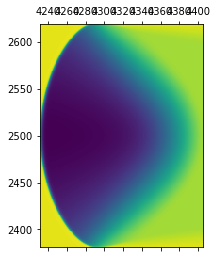

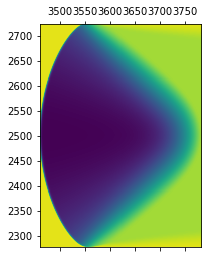

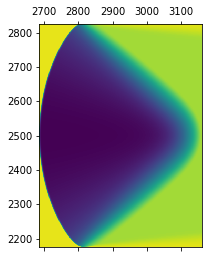

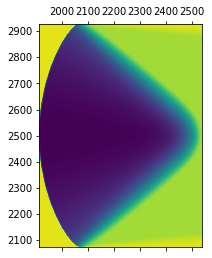

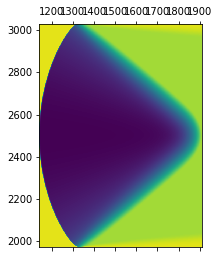

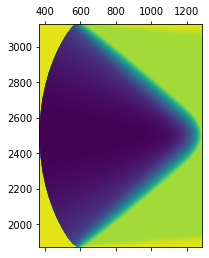

In [22]:
for t in list(df_m)[2:-2]:
    m=df_m[t].values
    xmin=np.where((np.roll(m[2500,:],1)>0)&(m[2500,:]<0))[0][0]
    xmax=np.where(m[2500,xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=2500#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)
    
    plt.matshow(m)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

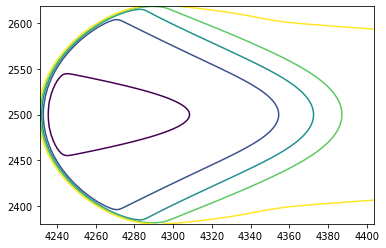

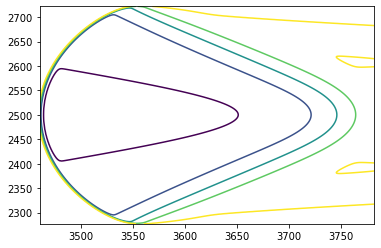

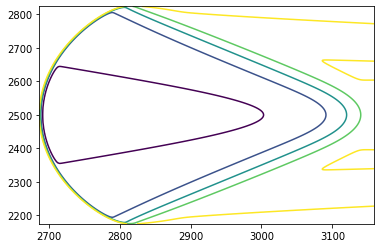

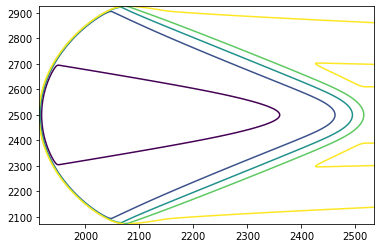

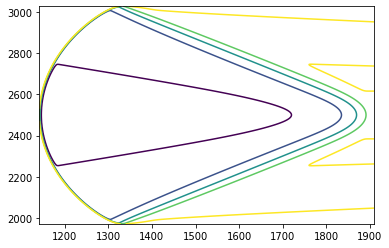

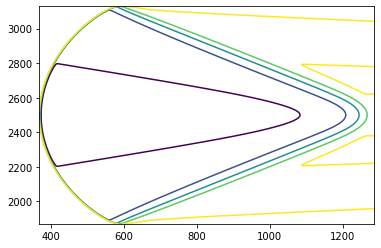

In [26]:
for t in list(df_m)[2:-2]:
    m=df_m[t].values
    xmin=np.where((np.roll(m[2500,:],1)>0)&(m[2500,:]<0))[0][0]
    xmax=np.where(m[2500,xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=2500#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=[-20, -15, -10, -5, 0])
    plt.show()
#plt.colorbar(cp)


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linestyle'


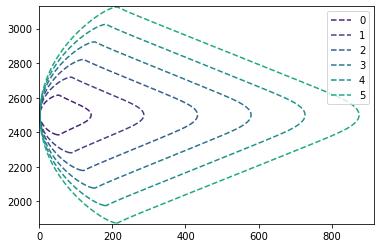

In [24]:
c=1
k=1
cp=[]
for t in list(df_m)[2:-2]:
    m=df_m[t].values
    xmin=np.where((np.roll(m[2500,:],1)>0)&(m[2500,:]<0))[0][0]
    xmax=np.where(m[2500,xmin:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=2500
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    xlist = np.arange(0, xmax-xmin)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp.append(plt.contour(X, Y, Z, levels=[-10], colors=[plt.get_cmap('viridis')(k/10)], linestyle='-'))

    k+=1
    

plt.legend([cp[k].legend_elements()[0][0] for k in range(6)], np.arange(6))
    